In [1]:
import torch
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import cv2

In [2]:
img = cv2.imread('specimens.png')

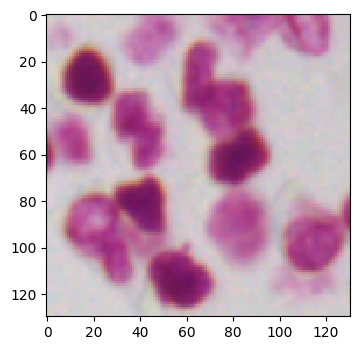

In [3]:
plt.rcParams['figure.dpi'] = 100
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

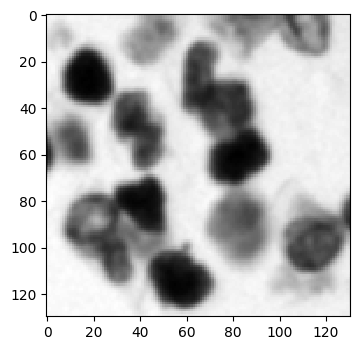

In [5]:
plt.rcParams['figure.dpi'] = 100
plt.imshow(gray,cmap='gray')

In [6]:
thresh,ret = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [7]:
thresh

146.0

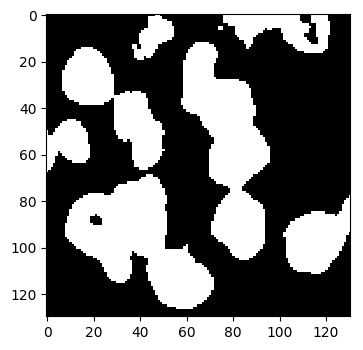

In [8]:
plt.rcParams['figure.dpi'] = 100
plt.imshow(ret,cmap='gray')

In [9]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(ret,cv2.MORPH_OPEN,kernel, iterations = 2)

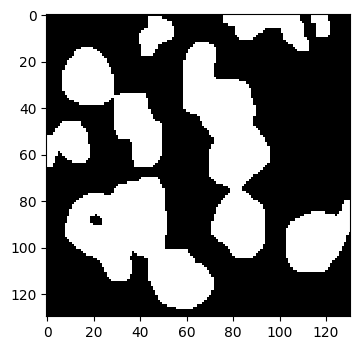

In [10]:
plt.rcParams['figure.dpi'] = 100
plt.imshow(opening,cmap='gray')

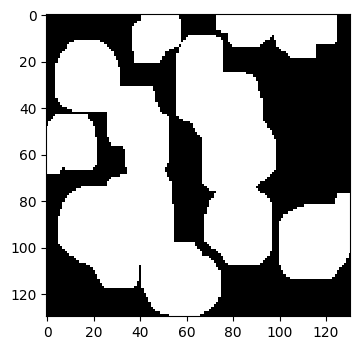

In [11]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.rcParams['figure.dpi'] = 100
plt.imshow(sure_bg,cmap='gray')

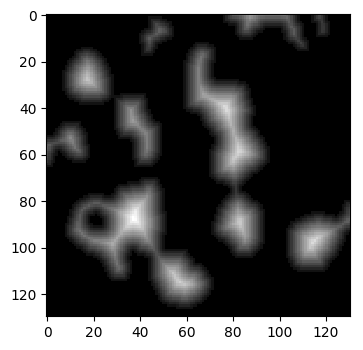

In [12]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.rcParams['figure.dpi'] = 100
plt.imshow(dist_transform,cmap='gray')

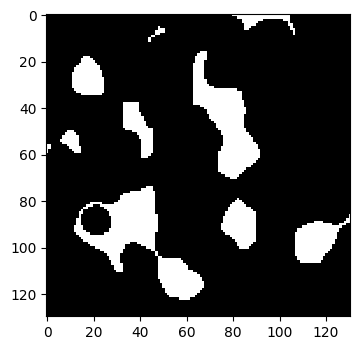

In [13]:
thresh2, sure_fg = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)
plt.rcParams['figure.dpi'] = 100
plt.imshow(sure_fg,cmap='gray')

In [14]:
sure_fg = np.uint8(sure_fg)
num, markers2 = cv2.connectedComponents(sure_fg)
print(num)

11


In [15]:
unknow = cv2.subtract(sure_bg, sure_fg)

markers2 = markers2 + 1

markers2[unknow == 255] = 0


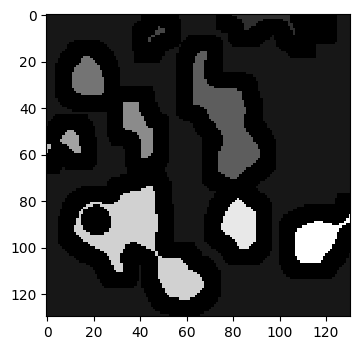

In [16]:
plt.rcParams['figure.dpi'] = 100
plt.imshow(markers2,cmap='gray')

In [17]:
result = cv2.watershed(img,markers2)

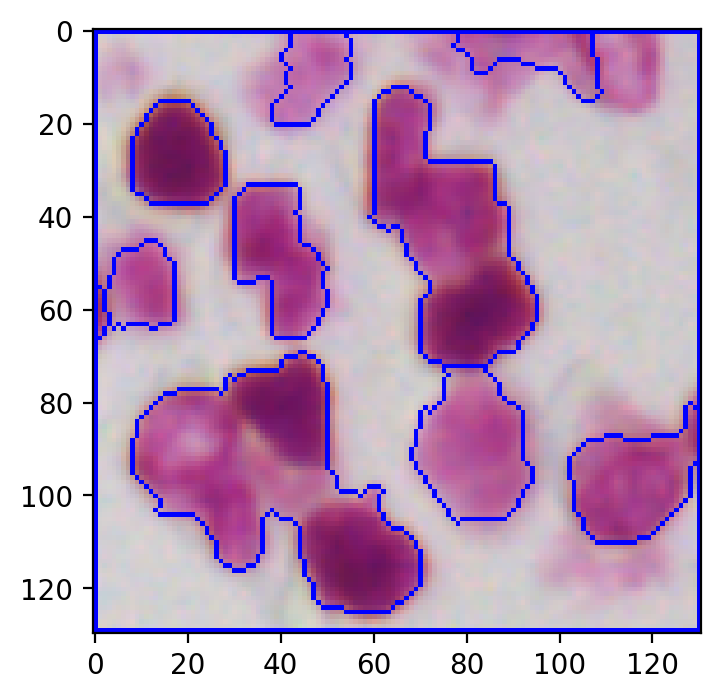

In [18]:
img[markers2 == -1] = [0,0,255]
plt.rcParams['figure.dpi'] = 200
plt.imshow(img,cmap='gray')